In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split



In [2]:
# Load the cleaned dataset
data = pd.read_csv('Resources/cleaned.csv')

# Preview the dataset
data.head()

,Customer_ID,Gender,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Average_Price,...,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_Percentage,Near_Holiday,State,Total_Sales,Total_Cost,Average_Saved($)
0,17850.0,M,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371
1,17850.0,M,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371
2,17850.0,M,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest Smart Devices,2.0,122.77,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,245.54,227.486,12.277
3,17850.0,M,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest Smart Devices,1.0,81.50,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,81.50,79.850,8.150
4,17850.0,M,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest Smart Devices,1.0,153.71,...,4500.0,2424.5,1,ELEC10,10.0,New Year's Day,Illinois,153.71,144.839,15.371


# Aggregation and Summary Statistics
- Analyze the distribution of spending, discounts, and total costs.

In [3]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)
# Aggregation by holidays
holiday_agg = data.groupby('Near_Holiday')['Total_Cost'].agg(['mean', 'sum']).reset_index()
print(holiday_agg)

        Customer_ID  Tenure_Months  Transaction_ID      Quantity  \
count  52955.000000   52955.000000    52955.000000  52955.000000   
mean   15346.709810      26.127995    32409.825675      4.497638   
std     1766.038862      13.474339     8646.137081     20.098825   
min    12346.000000       2.000000    16679.000000      1.000000   
25%    13869.000000      15.000000    25386.500000      1.000000   
50%    15311.000000      27.000000    32614.000000      1.000000   
75%    16992.000000      37.000000    39122.000000      2.000000   
max    18283.000000      50.000000    48497.000000    900.000000   

       Average_Price  Delivery_Charges           GST  Offline_Spend  \
count   52955.000000      52955.000000  52955.000000   52955.000000   
mean       52.237646         10.517630      0.137462    2830.914141   
std        63.988144         19.469912      0.045811     935.880188   
min         0.390000          0.000000      0.050000     500.000000   
25%         5.700000          6.

# Correlation Analysis
- Explore relationships between numerical features, like "Discount_Percentage", "Total_Cost", and "Avg_Dollars_Saved".

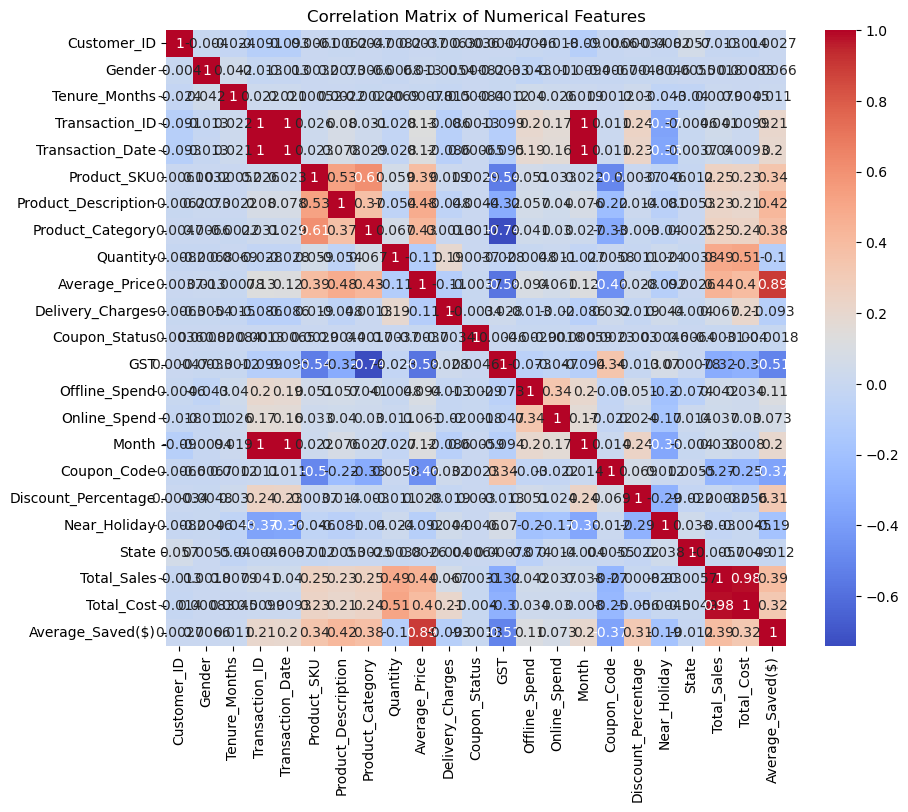

In [67]:
# Copy the dataset to avoid modifying the original
data_encoded = data.copy()

# Select categorical columns for encoding
categorical_cols = data_encoded.select_dtypes(include=['object', 'category']).columns

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()

for col in categorical_cols:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col].astype(str))

# Now, compute the correlation matrix with the encoded data
corr_matrix = data_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Time-Series Analysis
- Analyze spending patterns over time, particularly around holidays.

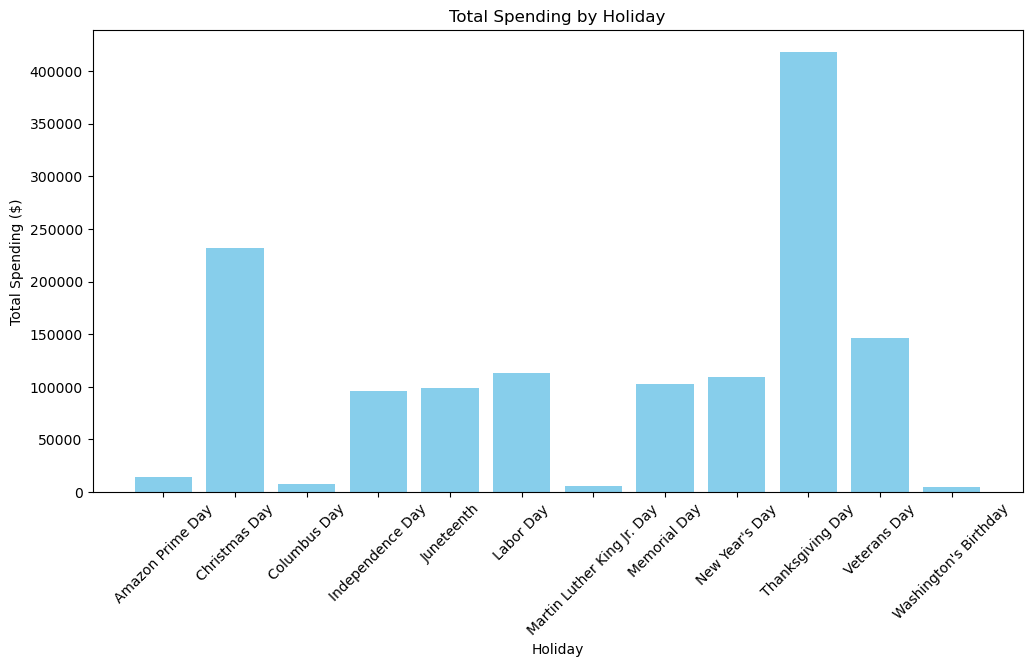

In [5]:
# Group by 'Near_Holiday' to get total spending during each holiday
holiday_spending = data.groupby('Near_Holiday')['Total_Cost'].sum().reset_index()

# Plot spending by holiday
plt.figure(figsize=(12, 6))
plt.bar(holiday_spending['Near_Holiday'], holiday_spending['Total_Cost'], color='skyblue')
plt.xlabel('Holiday')
plt.ylabel('Total Spending ($)')
plt.title('Total Spending by Holiday')
plt.xticks(rotation=45)
plt.show()

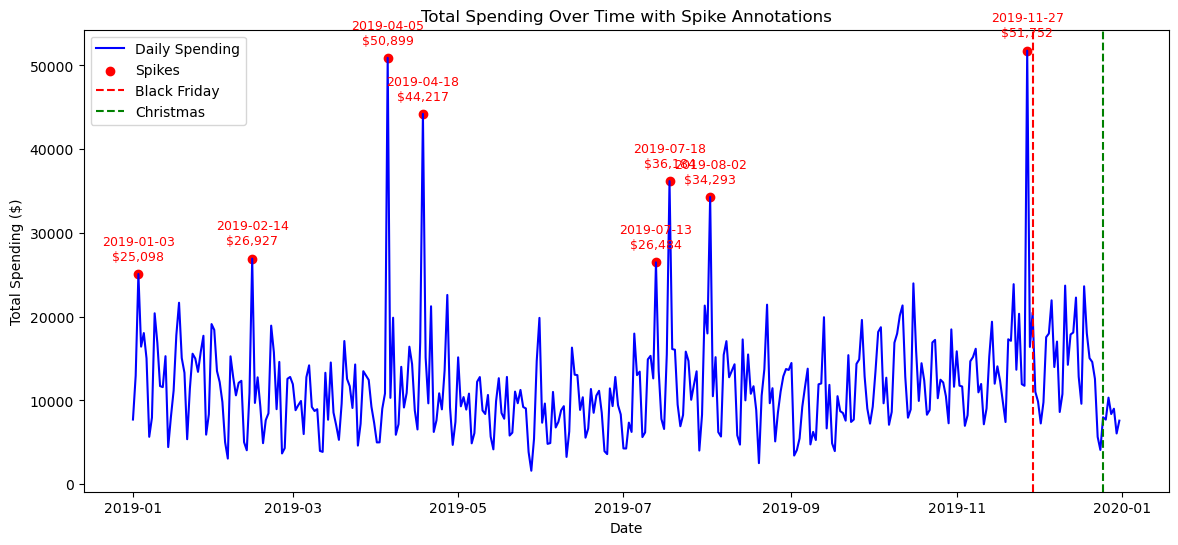

Dates and Spending Amounts for Spikes:
Transaction_Date
2019-01-03    25097.583139
2019-02-14    26927.414000
2019-04-05    50899.453936
2019-04-18    44216.744227
2019-07-13    26484.206970
2019-07-18    36184.371850
2019-08-02    34292.755874
2019-11-27    51751.745484
Name: Total_Cost, dtype: float64


In [6]:
# Convert 'Transaction_Date' to datetime if not already done
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

# Group spending by day
daily_spending = data.groupby('Transaction_Date')['Total_Cost'].sum()

# Define a threshold for identifying spikes (e.g., spending above a certain level)
spike_threshold = daily_spending.mean() + 2 * daily_spending.std()

# Identify spike dates
spike_dates = daily_spending[daily_spending > spike_threshold]

# Plot time-series with annotations
plt.figure(figsize=(14, 6))
plt.plot(daily_spending.index, daily_spending.values, label='Daily Spending', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Spending ($)')
plt.title('Total Spending Over Time with Spike Annotations')

# Highlight spike points
plt.scatter(spike_dates.index, spike_dates.values, color='red', label='Spikes')

# Annotate spike points with both amount and date
for date, value in spike_dates.items():
    annotation_text = f"{date.strftime('%Y-%m-%d')}\n${value:,.0f}"
    plt.annotate(annotation_text, (date, value), textcoords="offset points", xytext=(0, 10), 
                 ha='center', fontsize=9, color='red')

# Add vertical lines for specific holidays, e.g., Black Friday and Christmas
plt.axvline(pd.to_datetime('2019-11-29'), color='red', linestyle='--', label='Black Friday')
plt.axvline(pd.to_datetime('2019-12-25'), color='green', linestyle='--', label='Christmas')

# Add legend
plt.legend()
plt.show()

# Print the dates and amounts of the spikes
print("Dates and Spending Amounts for Spikes:")
print(spike_dates)



# Comparison of Spending by Demographics
- Compare spending trends by gender, location, and product category.

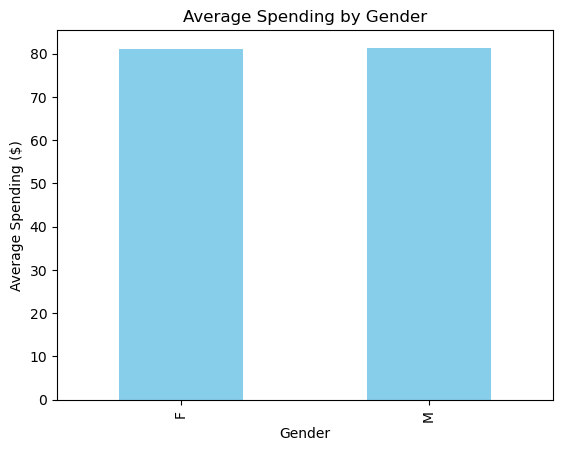

In [13]:
# Spending by gender
gender_spending = data.groupby('Gender')['Total_Cost'].mean()

# Plot spending by gender
gender_spending.plot(kind='bar', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Average Spending ($)')
plt.title('Average Spending by Gender')
plt.show()

# gender_spending

## What is each gender buying most frequently? 

In [65]:
# Transaction skew 

gender_product_skew= data.groupby('Gender')['Product_Description'].count()
gender_product_skew



Gender
F    33038
M    19917
Name: Product_Description, dtype: int64

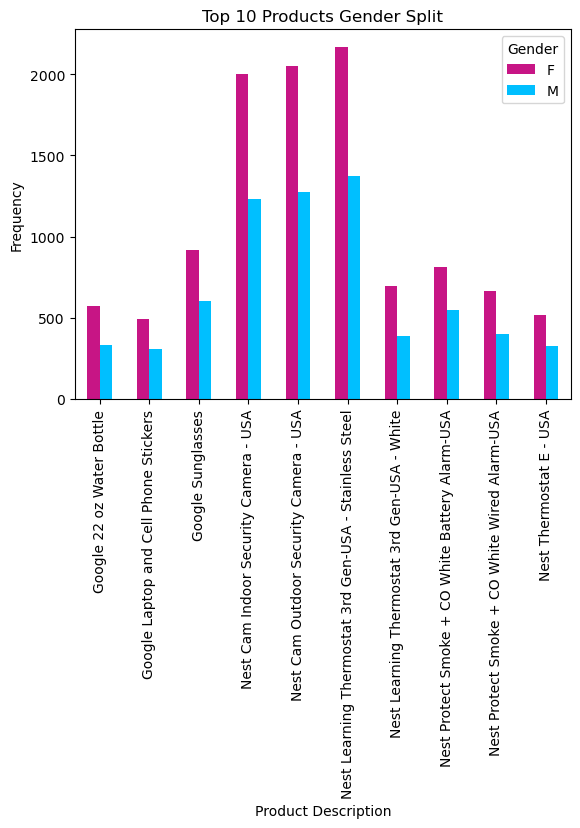

In [54]:
# Calculating product popularity 
product_popularity = data.copy()
product_popularity['count_per_prod'] = data.groupby('Product_Description')['Product_Description'].transform('count')
product_popularity = product_popularity.sort_values(by='count_per_prod', ascending=False)
top_10_products = product_popularity['Product_Description'].unique()[:10]

# Filtering for the top 10
product_popularity_top_10 = product_popularity[product_popularity['Product_Description'].isin(top_10_products)]

# Grouping by gender and prod description 
gender_split = product_popularity_top_10.groupby(['Product_Description', 'Gender']).size().unstack(fill_value=0)

# Plotting
gender_split.plot(kind='bar', color=['mediumvioletred', 'deepskyblue'])
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.title('Top 10 Products Gender Split')
plt.legend(title='Gender')
plt.show()

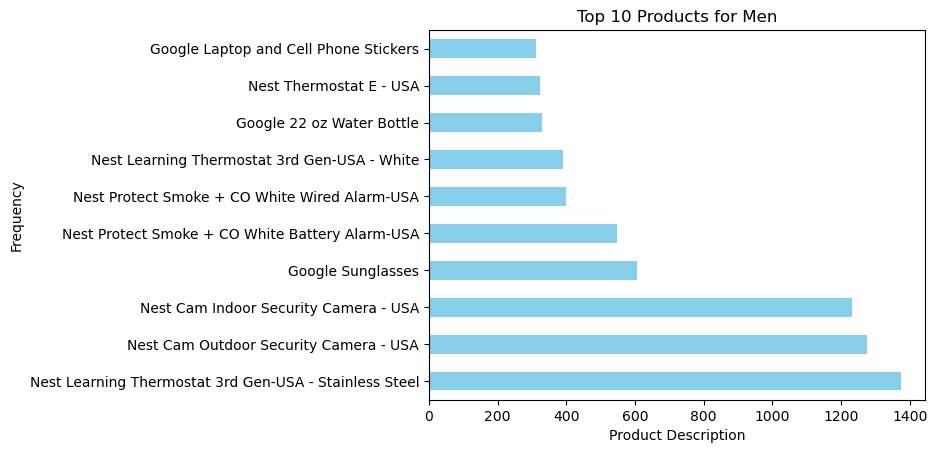

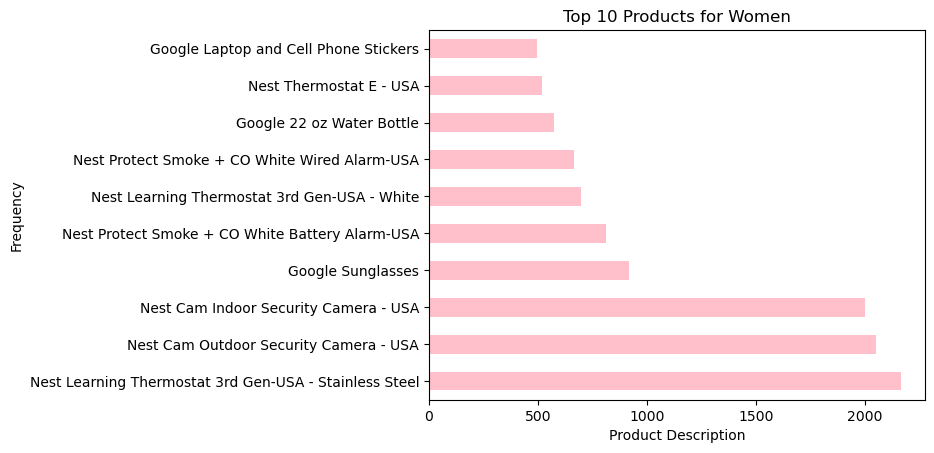

<Axes: title={'center': 'Top 10 Products for Men'}, xlabel='Product Description', ylabel='Frequency'>

In [64]:
#Top 10 products for Men
product_top_M10 = (
    product_popularity[product_popularity['Gender'] == 'M']
    .groupby('Product_Description')
    .size()
    .nlargest(10)
)

plt_product_top_M10 = product_top_M10.plot(kind='barh', color='skyblue')
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.title('Top 10 Products for Men')
plt.show()

#Top 10 Product for Women (should be the same as above)
product_top_F10 = (
    product_popularity[product_popularity['Gender'] == 'F']
    .groupby('Product_Description')
    .size()
    .nlargest(10)
)

plt_product_top_F10 = product_top_F10.plot(kind='barh', color='pink')
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.title('Top 10 Products for Women')
plt.show()

plt_product_top_F10 
plt_product_top_M10

Who's using the most coupons? 

# Analyze Promotion Effectiveness
## Investigate how discounts and coupon usage impact spending behavior:

### Correlation between discounts and spending:
    - Calculate the correlation between "Discount_Percentage" and "Total_Cost".

In [24]:
correlation = data['Discount_Percentage'].corr(data['Total_Cost'])
print(f'Correlation between Discount Percentage and Total Cost: {correlation}')


Correlation between Discount Percentage and Total Cost: -0.05590317137476381


### Visualize spending with/without coupons:

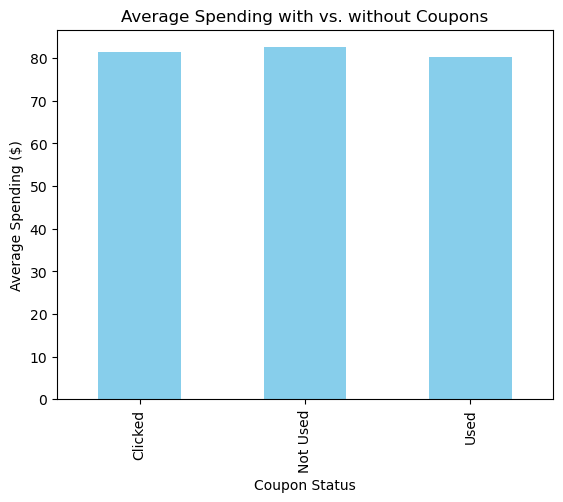

In [25]:
# Spending by coupon usage
coupon_spending = data.groupby('Coupon_Status')['Total_Cost'].mean()

# Plot spending by coupon usage
coupon_spending.plot(kind='bar', color='skyblue')
plt.xlabel('Coupon Status')
plt.ylabel('Average Spending ($)')
plt.title('Average Spending with vs. without Coupons')
plt.show()


## Set up the model using Scikit-learn:
- Use features like "Total_Cost", "Discount_Percentage", "Average_Saved($)", and "Near_Holiday" to predict spending trends.
- Split the data into training and testing sets:

In [ ]:

# Define features and target variable
X = data[['Discount_Percentage', 'Average_Saved($)', 'Total_Cost']]
y = data['Total_Cost']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train a regression model to predict spending trends

In [ ]:

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 4.5808906872880294e-14
